## Part 1: Demonstrating the Modules

In [1]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_jack = cv2.imread('Data/Jack_Ma.jpg')
img_jack = cv2.cvtColor(img_jack, cv2.COLOR_BGR2RGB)

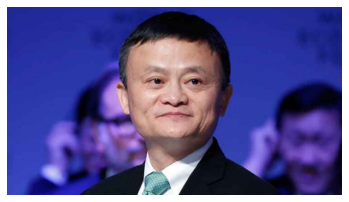

In [3]:
plt.imshow(img_jack)
plt.axis('off')
plt.show()

In [4]:
face_loc_jack = face_recognition.face_locations(img_jack)[0]
encode_jack = face_recognition.face_encodings(img_jack)[0]

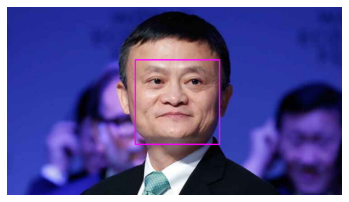

In [5]:
cv2.rectangle(img_jack,
              (face_loc_jack[1], face_loc_jack[2]),
              (face_loc_jack[3], face_loc_jack[0]),
              (255,0,255),
              2)
plt.imshow(img_jack)
plt.axis('off')
plt.savefig('Figures/Jack_Ma_Original.png')
plt.show()

In [6]:
encode_jack = face_recognition.face_encodings(img_jack)[0]

img_jack_test = cv2.imread('Data/Test/Jack_Ma2.jpg')
img_jack_test = cv2.cvtColor(img_jack_test, cv2.COLOR_BGR2RGB)
encode_jack_test = face_recognition.face_encodings(img_jack_test)[0]

img_elon = cv2.imread('Data/Elon_Musk.jpg')
img_elon = cv2.cvtColor(img_elon, cv2.COLOR_BGR2RGB)
encode_elon = face_recognition.face_encodings(img_elon)[0]

img_huateng = cv2.imread('Data/Ma_Huateng.jpeg')
img_huateng = cv2.cvtColor(img_huateng, cv2.COLOR_BGR2RGB)
encode_huateng = face_recognition.face_encodings(img_huateng)[0]

In [7]:
result_jack = face_recognition.compare_faces([encode_jack], encode_jack_test)
distance_jack = face_recognition.face_distance([encode_jack], encode_jack_test)

result_elon = face_recognition.compare_faces([encode_jack], encode_elon,
                                             tolerance = 0.5)
distance_elon = face_recognition.face_distance([encode_jack], encode_elon)

result_huateng = face_recognition.compare_faces([encode_jack], encode_huateng,
                                                tolerance = 0.5)
distance_huateng = face_recognition.face_distance([encode_jack], encode_huateng)

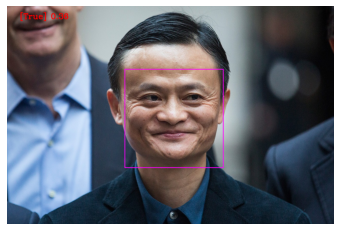

In [8]:
face_loc_jack_test = face_recognition.face_locations(img_jack_test)[0]
cv2.rectangle(img_jack_test,
              (face_loc_jack_test[1], face_loc_jack_test[2]),
              (face_loc_jack_test[3], face_loc_jack_test[0]),
              (255,0,255),
              2)

cv2.putText(img_jack_test,
            f'{result_jack} {round(distance_jack[0], 2)}',
            (50, 50),
            cv2.FONT_HERSHEY_COMPLEX,
            1, (255,0,0), 2)
plt.imshow(img_jack_test)
plt.axis('off')
plt.savefig('Figures/Jack_Ma.png')
plt.show()

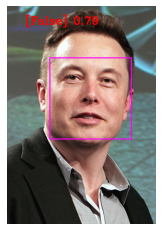

In [9]:
face_loc_elon = face_recognition.face_locations(img_elon)[0]
cv2.rectangle(img_elon,
              (face_loc_elon[1], face_loc_elon[2]),
              (face_loc_elon[3], face_loc_elon[0]),
              (255,0,255),
              2)

cv2.putText(img_elon,
            f'{result_elon} {round(distance_elon[0], 2)}',
            (50, 50),
            cv2.FONT_HERSHEY_COMPLEX,
            1, (255,0,0), 2)
plt.imshow(img_elon)
plt.axis('off')
plt.savefig('Figures/Elon_Musk.png')
plt.show()

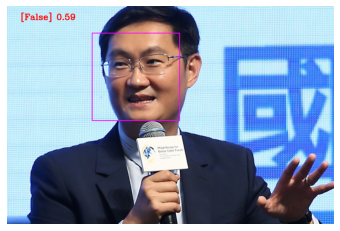

In [10]:
face_loc_huateng = face_recognition.face_locations(img_huateng)[0]
cv2.rectangle(img_huateng,
              (face_loc_huateng[1], face_loc_huateng[2]),
              (face_loc_huateng[3], face_loc_huateng[0]),
              (255,0,255),
              2)

cv2.putText(img_huateng,
            f'{result_huateng} {round(distance_huateng[0], 2)}',
            (50, 50),
            cv2.FONT_HERSHEY_COMPLEX,
            1, (255,0,0), 2)
plt.imshow(img_huateng)
plt.axis('off')
plt.savefig('Figures/Ma_Huateng.png')
plt.show()

## Part 2: Face Recognition Project

In [11]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
path = 'Data'
print(os.listdir(path))

['Test', 'Ma_Huateng.jpeg', 'Elon_Musk.jpg', 'Jack_Ma.jpg']


In [13]:
images = []
class_names = []
my_list = os.listdir(path)[1:]

for cls in my_list:
    cur_img = cv2.imread(os.path.join(path, cls))
    images.append(cur_img)
    class_names.append(cls.split('.')[0])
    
print(class_names)

['Ma_Huateng', 'Elon_Musk', 'Jack_Ma']


In [14]:
def FindEncodings(images):
    encode_list = []
    for img in images:
        cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encode_list.append(encode)
    return encode_list

In [15]:
encode_list = FindEncodings(images)
print("Encoding Complete!")
print(len(encode_list))

Encoding Complete!
3


In [16]:
def MarkFace(img):
    frame = cv2.imread(img)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_sm = cv2.resize(frame, (0,0), None, 0.25, 0.25)
    
    faces_locs = face_recognition.face_locations(frame_sm)
    encodings = face_recognition.face_encodings(frame_sm, faces_locs)
    
    for encoding, face in zip(encodings, faces_locs):
        matches = face_recognition.compare_faces(encode_list,
        										 encoding,
        										 tolerance = 0.5)
        distance = face_recognition.face_distance(encode_list, encoding)
        match_index = np.argmin(distance)
        
        if matches[match_index]:
            name = class_names[match_index].upper()
            y1, x2, y2, x1 = face
            y1, x2, y2, x1 = y1*4, x2*4, y2*4, x1*4
            cv2.rectangle(frame, (x1, y1), (x2, y2),
                          (0,255,0), 2)
            cv2.rectangle(frame, (x1, y2 - 35), (x2, y2),
            	          (0,255,0), cv2.FILLED)
            cv2.putText(frame, name, (x1+6, y2-6),
            			cv2.FONT_HERSHEY_COMPLEX,
            			1, (255,255,255), 2)
            
    plt.imshow(frame)
    plt.axis('off')
    plt.savefig('Figures/Jack_Ma2.png')
    plt.show

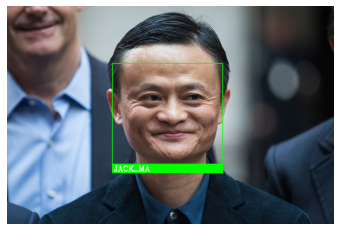

In [17]:
img = 'Data/Test/Jack_Ma2.jpg'
MarkFace(img)